In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras.layers import LSTM

In [32]:
stock = "TSLA"
df = pd.DataFrame(yf.download(stock, '2010-01-01', '2022-12-31')["Close"])

[*********************100%***********************]  1 of 1 completed


In [14]:
df  = pd.read_excel("D:/KTrinh/R/time_series/Data/VN_GDP_2020.xlsx")

In [17]:
df.dropna(inplace=True)

In [37]:
def rolling(lag, data):
    A = []
    df = data.values
    for i in range(lag, len(df)):
        A.append(df[i-lag:i]) 
    return A

def train_test_split(x,y,test_size):
    i = int(len(x)*test_size)
    j = int(len(y)*test_size)
    return x[:i], x[i:], y[:j], y[j:]

def RNN(x, y, lag):
    model = Sequential()
    model.add(LSTM(units=100, return_sequences=True, input_shape=(lag,1)))
    model.add(Dropout(0.3))
    model.add(LSTM(units=100, return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(units=100, return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(units=100, return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(units=50))
    model.add(Dropout(0.3))
    model.add(Dense(units=1))

    #RMSProp is working fine with LSTM but so do ADAM optimizer
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(np.array(x), np.array(y), epochs=100, batch_size=32)
    return model

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data = pd.DataFrame(scaler.fit_transform(df["Close"].values.reshape(-1,1)))
data

,0
0,0.001319
1,0.001309
2,0.001004
3,0.000554
4,0.000051
...,...
3145,0.298586
3146,0.264227
3147,0.273055
3148,0.295333


In [35]:
lag = 5
A = rolling(lag, data)
b = data.values[lag::]

deon, dete, keyon, keyte = train_test_split(A,b, test_size=0.5)

In [38]:
a = RNN(deon,keyon,lag)

Epoch 1/100
50/50 [==============================] - 22s 53ms/step - loss: 2.7018e-04
Epoch 2/100
50/50 [==============================] - 2s 46ms/step - loss: 2.4699e-04
Epoch 3/100
50/50 [==============================] - 3s 51ms/step - loss: 1.4164e-04
Epoch 4/100
50/50 [==============================] - 2s 48ms/step - loss: 1.5939e-05
Epoch 5/100
50/50 [==============================] - 2s 48ms/step - loss: 1.2687e-05
Epoch 6/100
50/50 [==============================] - 3s 52ms/step - loss: 1.0811e-05
Epoch 7/100
50/50 [==============================] - 3s 57ms/step - loss: 1.0091e-05
Epoch 8/100
50/50 [==============================] - 3s 53ms/step - loss: 9.5178e-06
Epoch 9/100
50/50 [==============================] - 2s 45ms/step - loss: 1.1671e-05
Epoch 10/100
50/50 [==============================] - 3s 62ms/step - loss: 9.4057e-06
Epoch 11/100
50/50 [==============================] - 3s 57ms/step - loss: 7.7217e-06
Epoch 12/100
50/50 [==============================] - 2s 45ms/

99/99 [==============================] - 7s 12ms/step


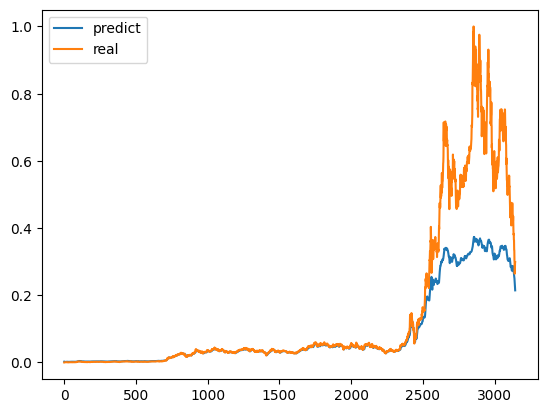

In [39]:
p =a.predict(np.array(A))
plt.plot(p, label="predict")
plt.plot(np.array(b), label="real")
plt.legend()
plt.show()

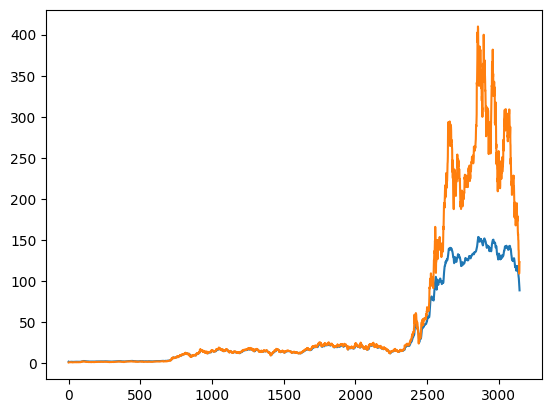

In [41]:
plt.plot(scaler.inverse_transform(p))
plt.plot(scaler.inverse_transform(b))

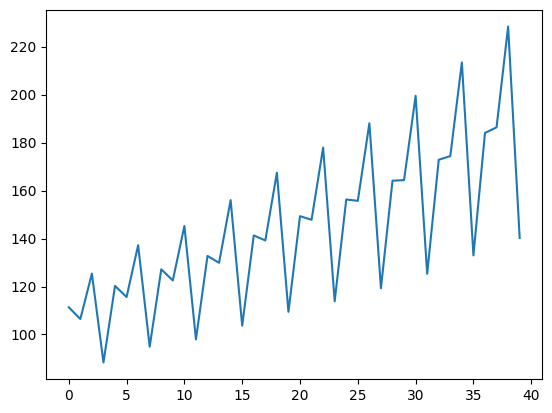

In [19]:
plt.plot(keyon)